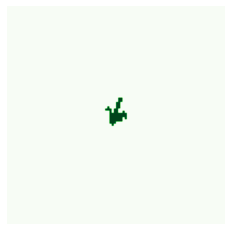

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython

# Define the size of the grid
grid_size = 100

# Create the grid with a central seed
grid = np.zeros((grid_size, grid_size))
grid[grid_size//2, grid_size//2] = 1

# Define the neighbor offsets
neighbor_offsets = np.array([[-1, 0], [0, -1], [1, 0], [0, 1]])

# Define the function to add a new particle to the cluster
def add_particle():
    # Pick a random location on the grid
    x, y = np.random.randint(0, grid_size, size=2)
    
    # Check if any of the neighbors are occupied
    for dx, dy in neighbor_offsets:
        if grid[(x+dx)%grid_size, (y+dy)%grid_size] == 1:
            # If a neighbor is occupied, add the new particle to the cluster
            grid[x, y] = 1
            return
    
    # If none of the neighbors are occupied, try again
    add_particle()

# Define the animation function
def animate(frame):
    add_particle()
    plt.clf()
    plt.imshow(grid, cmap='Greens')
    plt.axis('off')

# Create the animation
ani = animation.FuncAnimation(plt.gcf(), animate, frames=100, interval=50)

# Show the animation
IPython.display.HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython


# Define the size of the grid
grid_size = 100

# Create the grid with a central seed
grid = np.zeros((grid_size, grid_size))
grid[grid_size//2, grid_size//2] = 1

# Define the neighbor offsets
neighbor_offsets = np.array([[-1, 0], [0, -1], [1, 0], [0, 1]])

# Define the function to add a new particle to the cluster
def add_particle():
    # Pick a random location on the edge of the grid
    edge = np.random.randint(0, 4)
    if edge == 0:
        x, y = np.random.randint(1, grid_size-1), 0
    elif edge == 1:
        x, y = np.random.randint(1, grid_size-1), grid_size-1
    elif edge == 2:
        x, y = 0, np.random.randint(1, grid_size-1)
    else:
        x, y = grid_size-1, np.random.randint(1, grid_size-1)
        
    # Check if any of the neighbors are occupied
    for dx, dy in neighbor_offsets:
        if grid[(x+dx)%grid_size, (y+dy)%grid_size] == 1:
            # If a neighbor is occupied, add the new particle to the cluster
            grid[x, y] = 1
            return
    
    # If none of the neighbors are occupied, try again
    add_particle()

# Define the animation function
def animate(frame):
    add_particle()
    plt.clf()
    plt.imshow(grid, cmap='Greens')
    plt.axis('off')

# Create the animation
ani = animation.FuncAnimation(plt.gcf(), animate, frames=100, interval=50)

# Show the animation
IPython.display.HTML(ani.to_jshtml())


Enter the number of generations: 10


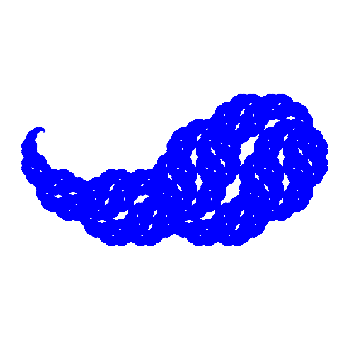

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def koch_curve(x, y, angle, order, size):
    if order == 0:
        # Base case: draw a straight line
        x1 = x + size * np.cos(angle)
        y1 = y + size * np.sin(angle)
        return [(x, y), (x1, y1)]
    else:
        # Recursive case: generate four Koch curves
        result = []
        for angle_offset in [0, np.pi/3, -2*np.pi/3, np.pi/3]:
            result.extend(koch_curve(x, y, angle+angle_offset, order-1, size/3))
            x, y = result[-1]
        return result

# Prompt the user to input the number of generations
num_generations = int(input("Enter the number of generations: "))

# Generate the Koch curve
vertices = koch_curve(0, 0, np.pi/3, num_generations, 1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
ax.axis('off')

# Plot the Koch curve
x, y = zip(*vertices)
ax.plot(x, y, color='blue')

# Show the plot
plt.show()

